In [361]:
import pickle
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as plt

In [362]:
# loading the data
infile = open('data/fitbit_and_sema_stress_experiment_dates.pkl','rb')
sema_mood = pickle.load(infile)
infile.close()
sema_mood

,id,date,stress_score,ALERT,HAPPY,NEUTRAL,RESTED/RELAXED,SAD,TENSE/ANXIOUS,TIRED,positive feelings,negative feelings
0,621e301e67b776a240608a72,2021-05-24,74.0,0,0,0,1,0,0,0,1,0
1,621e2f3967b776a240c654db,2021-05-24,76.0,0,0,0,1,0,0,0,1,0
2,621e36f967b776a240e5e7c9,2021-05-24,83.0,0,0,0,0,0,0,1,0,1
3,621e36f967b776a240e5e7c9,2021-05-24,83.0,0,0,0,0,0,1,0,0,1
4,621e32af67b776a24045b4cf,2021-05-24,79.0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2111,621e2f1b67b776a240b3d87c,2022-01-16,76.0,0,0,1,0,0,0,0,1,0
2112,621e2f9167b776a240011ccb,2022-01-16,76.0,0,0,0,0,0,1,0,0,1
2113,621e2f9167b776a240011ccb,2022-01-16,76.0,0,0,0,0,0,1,0,0,1
2114,621e346f67b776a24081744f,2022-01-17,72.0,0,0,0,0,0,1,0,0,1


In [363]:
sema_mood=sema_mood.rename(columns={"user_id": "id"})

In [364]:
sema_mood.columns

Index(['id', 'date', 'stress_score', 'ALERT', 'HAPPY', 'NEUTRAL',
       'RESTED/RELAXED', 'SAD', 'TENSE/ANXIOUS', 'TIRED', 'positive feelings',
       'negative feelings'],
      dtype='object')

In [365]:
# loading the data
infile = open('data/daily_fitbit_sema_df_unprocessed.pkl','rb')
fitbit = pickle.load(infile)
infile.close()
fitbit

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,...,step_goal,min_goal,max_goal,step_goal_label,HAPPY,NEUTRAL,TENSE/ANXIOUS,HOME,OUTDOORS,WORK/SCHOOL
0,621e2e8e67b776a24055b564,2021-05-24,34.137687,57.432,89.603,NaN,14.8,78.0,0.833333,0.675,...,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
1,621e2e8e67b776a24055b564,2021-05-25,33.794544,57.681,94.303,NaN,15.8,80.0,0.833333,0.725,...,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
2,621e2e8e67b776a24055b564,2021-05-26,34.611011,57.481,119.212,NaN,14.6,84.0,0.966667,0.725,...,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
3,621e2e8e67b776a24055b564,2021-05-27,34.408304,57.493,111.709,NaN,14.8,82.0,0.933333,0.725,...,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
4,621e2e8e67b776a24055b564,2021-05-28,34.178922,56.750,103.034,NaN,15.2,81.0,0.866667,0.725,...,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7348,621e375b67b776a240290cdc,2021-08-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
7349,621e375b67b776a240290cdc,2021-08-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
7350,621e375b67b776a240290cdc,2021-08-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
7351,621e375b67b776a240290cdc,2021-08-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN


In [366]:
# selecting experiment days
fitbit = fitbit.sort_values(by='date', ascending=True)
fitbit['date'] = pd.to_datetime(fitbit['date'].astype("str"), format='%Y-%m-%d')
fitbit1 = fitbit[(fitbit['date'] >= "2021-05-24") & (fitbit['date'] <= "2021-07-26")] #Round1
fitbit2 = fitbit[(fitbit['date'] >= "2021-11-15") & (fitbit['date'] <= "2022-01-17")] #Round2
fitbit=pd.concat([fitbit1, fitbit2], ignore_index=True)
fitbit

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,...,step_goal,min_goal,max_goal,step_goal_label,HAPPY,NEUTRAL,TENSE/ANXIOUS,HOME,OUTDOORS,WORK/SCHOOL
0,621e2e8e67b776a24055b564,2021-05-24,34.137687,57.432,89.603,NaN,14.8,78.0,0.833333,0.675,...,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
1,621e301e67b776a240608a72,2021-05-24,34.710232,NaN,NaN,NaN,NaN,74.0,0.700000,0.700,...,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
2,621e301367b776a24057738e,2021-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
3,621e360b67b776a24039709f,2021-05-24,NaN,68.321,31.413,NaN,15.4,69.0,0.633333,0.650,...,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
4,621e2fce67b776a240279baa,2021-05-24,34.783747,83.170,15.941,96.6,15.2,70.0,0.733333,0.725,...,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4902,621e30e267b776a240e5bf90,2022-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
4903,621e322367b776a240e44e9b,2022-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
4904,621e300767b776a2404dc717,2022-01-17,33.186399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
4905,621e2f1b67b776a240b3d87c,2022-01-17,34.404580,65.782,23.793,NaN,16.0,72.0,0.766667,0.725,...,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN


In [367]:
fitbit.columns

Index(['id', 'date', 'nightly_temperature', 'nremhr', 'rmssd', 'spo2',
       'full_sleep_breathing_rate', 'stress_score', 'sleep_points_percentage',
       'exertion_points_percentage', 'responsiveness_points_percentage',
       'daily_temperature_variation', 'badgeType', 'calories',
       'filteredDemographicVO2Max', 'distance', 'activityType', 'bpm',
       'lightly_active_minutes', 'moderately_active_minutes',
       'very_active_minutes', 'sedentary_minutes', 'mindfulness_session',
       'scl_avg', 'resting_hr', 'sleep_duration', 'minutesToFallAsleep',
       'minutesAsleep', 'minutesAwake', 'minutesAfterWakeup',
       'sleep_efficiency', 'sleep_deep_ratio', 'sleep_wake_ratio',
       'sleep_light_ratio', 'sleep_rem_ratio', 'steps',
       'minutes_in_default_zone_1', 'minutes_below_default_zone_1',
       'minutes_in_default_zone_2', 'minutes_in_default_zone_3', 'age',
       'gender', 'bmi', 'step_goal', 'min_goal', 'max_goal', 'step_goal_label',
       'HAPPY', 'NEUTRAL', 'T

In [368]:
fitbit=fitbit.drop(columns=['stress_score', 'HAPPY', 'NEUTRAL', 'TENSE/ANXIOUS', 'HOME', 'OUTDOORS',
                     'WORK/SCHOOL','min_goal','max_goal' ])

In [369]:
data=fitbit.merge(sema_mood,on=['date','id'])
data

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,...,stress_score,ALERT,HAPPY,NEUTRAL,RESTED/RELAXED,SAD,TENSE/ANXIOUS,TIRED,positive feelings,negative feelings
0,621e301e67b776a240608a72,2021-05-24,34.710232,NaN,NaN,NaN,NaN,0.700000,0.700,0.833333,...,74.0,0,0,0,1,0,0,0,1,0
1,621e2f3967b776a240c654db,2021-05-24,NaN,69.820,28.594,NaN,16.4,0.800000,0.850,0.600000,...,76.0,0,0,0,1,0,0,0,1,0
2,621e36f967b776a240e5e7c9,2021-05-24,NaN,59.911,61.157,95.4,15.0,0.933333,0.775,0.800000,...,83.0,0,0,0,0,0,0,1,0,1
3,621e36f967b776a240e5e7c9,2021-05-24,NaN,59.911,61.157,95.4,15.0,0.933333,0.775,0.800000,...,83.0,0,0,0,0,0,1,0,0,1
4,621e32af67b776a24045b4cf,2021-05-24,NaN,51.622,43.536,97.8,13.8,0.833333,0.700,0.866667,...,79.0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2111,621e2f1b67b776a240b3d87c,2022-01-16,34.459913,59.816,34.088,NaN,16.0,0.666667,0.775,0.833333,...,76.0,0,0,1,0,0,0,0,1,0
2112,621e2f9167b776a240011ccb,2022-01-16,34.359505,59.255,26.811,95.4,15.4,0.700000,0.800,0.766667,...,76.0,0,0,0,0,0,1,0,0,1
2113,621e2f9167b776a240011ccb,2022-01-16,34.359505,59.255,26.811,95.4,15.4,0.700000,0.800,0.766667,...,76.0,0,0,0,0,0,1,0,0,1
2114,621e346f67b776a24081744f,2022-01-17,32.903545,71.863,25.475,NaN,18.2,0.833333,0.625,0.733333,...,72.0,0,0,0,0,0,1,0,0,1


In [370]:
data=data.drop(columns=['id', 'date','ALERT','HAPPY','NEUTRAL','RESTED/RELAXED','SAD','TENSE/ANXIOUS','TIRED','positive feelings'])

In [371]:
data

,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,badgeType,...,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,age,gender,bmi,step_goal,step_goal_label,stress_score,negative feelings
0,34.710232,NaN,NaN,NaN,NaN,0.700000,0.700,0.833333,NaN,None,...,997.0,49.0,0.0,<30,FEMALE,19.0,None,None,74.0,0
1,NaN,69.820,28.594,NaN,16.4,0.800000,0.850,0.600000,NaN,None,...,1162.0,0.0,0.0,>=30,MALE,24.0,None,None,76.0,0
2,NaN,59.911,61.157,95.4,15.0,0.933333,0.775,0.800000,NaN,None,...,1259.0,0.0,0.0,<30,FEMALE,>=25,None,None,83.0,1
3,NaN,59.911,61.157,95.4,15.0,0.933333,0.775,0.800000,NaN,None,...,1259.0,0.0,0.0,<30,FEMALE,>=25,None,None,83.0,1
4,NaN,51.622,43.536,97.8,13.8,0.833333,0.700,0.866667,NaN,None,...,1289.0,0.0,0.0,<30,MALE,22.0,None,None,79.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2111,34.459913,59.816,34.088,NaN,16.0,0.666667,0.775,0.833333,NaN,None,...,1059.0,0.0,0.0,>=30,FEMALE,22.0,None,None,76.0,0
2112,34.359505,59.255,26.811,95.4,15.4,0.700000,0.800,0.766667,NaN,None,...,1214.0,0.0,0.0,>=30,FEMALE,20.0,None,None,76.0,1
2113,34.359505,59.255,26.811,95.4,15.4,0.700000,0.800,0.766667,NaN,None,...,1214.0,0.0,0.0,>=30,FEMALE,20.0,None,None,76.0,1
2114,32.903545,71.863,25.475,NaN,18.2,0.833333,0.625,0.733333,NaN,None,...,1384.0,0.0,0.0,None,None,None,None,None,72.0,1


In [372]:
data.columns

Index(['nightly_temperature', 'nremhr', 'rmssd', 'spo2',
       'full_sleep_breathing_rate', 'sleep_points_percentage',
       'exertion_points_percentage', 'responsiveness_points_percentage',
       'daily_temperature_variation', 'badgeType', 'calories',
       'filteredDemographicVO2Max', 'distance', 'activityType', 'bpm',
       'lightly_active_minutes', 'moderately_active_minutes',
       'very_active_minutes', 'sedentary_minutes', 'mindfulness_session',
       'scl_avg', 'resting_hr', 'sleep_duration', 'minutesToFallAsleep',
       'minutesAsleep', 'minutesAwake', 'minutesAfterWakeup',
       'sleep_efficiency', 'sleep_deep_ratio', 'sleep_wake_ratio',
       'sleep_light_ratio', 'sleep_rem_ratio', 'steps',
       'minutes_in_default_zone_1', 'minutes_below_default_zone_1',
       'minutes_in_default_zone_2', 'minutes_in_default_zone_3', 'age',
       'gender', 'bmi', 'step_goal', 'step_goal_label', 'stress_score',
       'negative feelings'],
      dtype='object')

In [373]:
import sklearn
# PyCaret is not yet compatible with sklearn>=0.23.2.
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.23.2.


In [374]:
# 1.20.3
import numpy
print('The numpy version is {}.'.format(numpy.__version__))

The numpy version is 1.20.3.


In [375]:
# scipy<=1.5.4
import scipy
print('The scipy version is {}.'.format(scipy.__version__))

The scipy version is 1.5.4.


In [376]:
# 1.5.0
import pandas
print('The pandas version is {}.'.format(pandas.__version__))

The pandas version is 1.5.0.


In [377]:
import pycaret

In [378]:
from pycaret.classification import *

In [379]:
#from sklearn.model_selection import train_test_split
#x=data.iloc[:,0:51]
#y=data.iloc[:,-1]
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=False)

# Setup
The setup function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column.

In [380]:
s = setup(data=data, target='negative feelings', silent=True, fix_imbalance=True)

,Description,Value
0,session_id,2211
1,Target,negative feelings
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(2116, 44)"
5,Missing Values,True
6,Numeric Features,30
7,Categorical Features,13
8,Ordinal Features,False
9,High Cardinality Features,False


create_model_container: 0
master_model_container: 0
display_container: 1
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='negative feelings',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                nu...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster

In [381]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6536,0.6917,0.6490,0.6356,0.6399,0.3065,0.3088,0.1440
gbc,Gradient Boosting Classifier,0.6509,0.6986,0.6392,0.6335,0.6346,0.3006,0.3020,0.1800
rf,Random Forest Classifier,0.6482,0.6857,0.6365,0.6323,0.6322,0.2953,0.2975,0.1010
et,Extra Trees Classifier,0.6388,0.6713,0.5628,0.6406,0.5973,0.2724,0.2756,0.1150
dt,Decision Tree Classifier,0.6287,0.6491,0.5374,0.6345,0.5793,0.2511,0.2559,0.0190
ada,Ada Boost Classifier,0.6226,0.6668,0.6139,0.6025,0.6066,0.2441,0.2454,0.0680
lda,Linear Discriminant Analysis,0.6171,0.6427,0.6335,0.5929,0.6113,0.2346,0.2363,0.0280
ridge,Ridge Classifier,0.6083,0.0000,0.6305,0.5837,0.6049,0.2175,0.2192,0.0170
knn,K Neighbors Classifier,0.5355,0.5459,0.5107,0.5142,0.5118,0.0690,0.0691,0.0270
lr,Logistic Regression,0.5321,0.5403,0.4817,0.4585,0.4686,0.0586,0.0589,0.5550


create_model_container: 14
master_model_container: 14
display_container: 2
LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=2211, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
compare_models() succesfully completed......................................


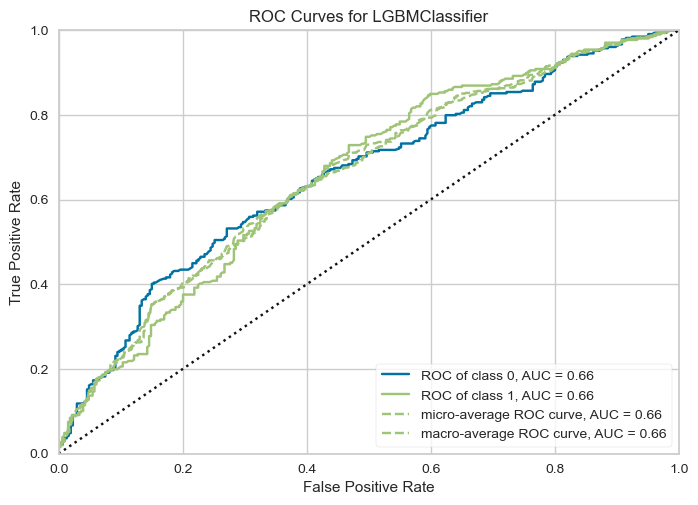

Visual Rendered Successfully
plot_model() succesfully completed......................................


In [382]:
plot_model(best, plot = 'auc')

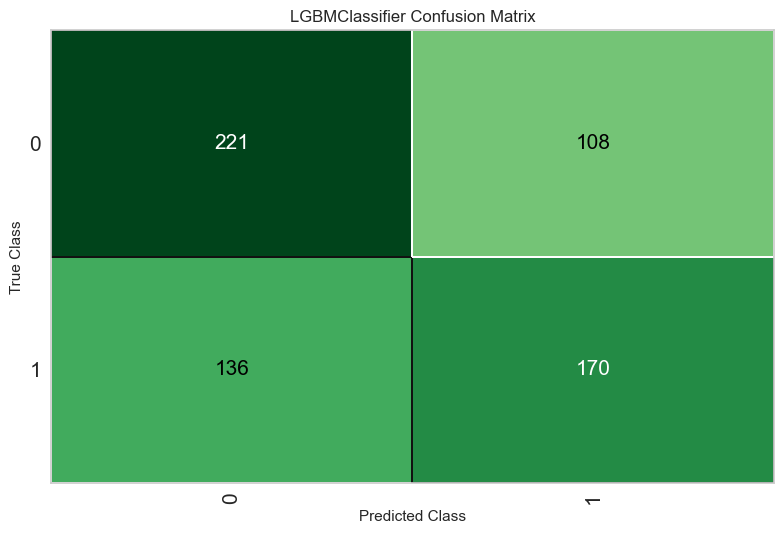

Visual Rendered Successfully
plot_model() succesfully completed......................................


In [383]:
plot_model(best, plot = 'confusion_matrix')

In [384]:
predict_model(best)

Initializing predict_model()
predict_model(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=2211, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
Checking exceptions
Preloading libraries
Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.6157,0.6587,0.5556,0.6115,0.5822,0.2280,0.2289


,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,calories,...,bmi_23.0,bmi_24.0,bmi_26.0,bmi_<19,bmi_>=25,bmi_>=30,step_goal_label_10000-14999,negative feelings,Label,Score
0,33.892632,62.859001,49.395000,95.772934,12.0,0.566667,0.925,0.766667,-1.26126,2136.98291,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,0.9761
1,33.846073,59.605000,29.641001,95.772934,16.0,0.933333,0.650,0.800000,-1.26126,2136.98291,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.8626
2,34.476864,58.652000,109.509003,95.772934,14.8,0.933333,0.725,0.900000,-1.26126,2136.98291,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,0.8693
3,34.219219,49.584999,62.584999,97.000000,11.0,0.900000,0.900,0.866667,-1.26126,2136.98291,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9522
4,34.269928,67.880997,62.533001,95.599998,14.6,0.833333,0.925,0.666667,-1.26126,2136.98291,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.9138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,33.727474,54.912998,32.484001,95.772934,16.6,1.000000,0.725,0.800000,-1.26126,2136.98291,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9652
631,34.305714,65.558998,35.779999,95.772934,10.8,0.633333,0.625,0.833333,-1.26126,2136.98291,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8801
632,34.573475,79.057999,17.570999,96.400002,15.2,0.933333,0.900,0.533333,-1.26126,2136.98291,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,0.7983
633,32.988258,66.792999,33.181999,95.772934,15.6,0.800000,0.925,0.700000,-1.26126,2136.98291,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9562


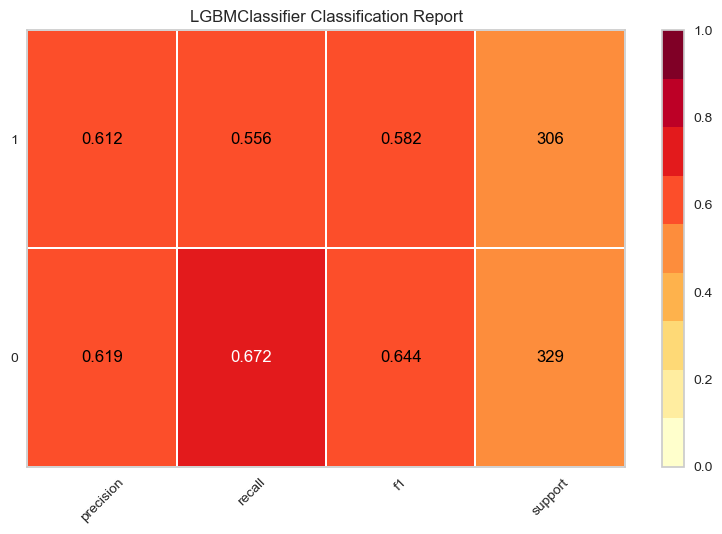

Visual Rendered Successfully
plot_model() succesfully completed......................................


In [385]:
plot_model(best, plot = 'class_report')

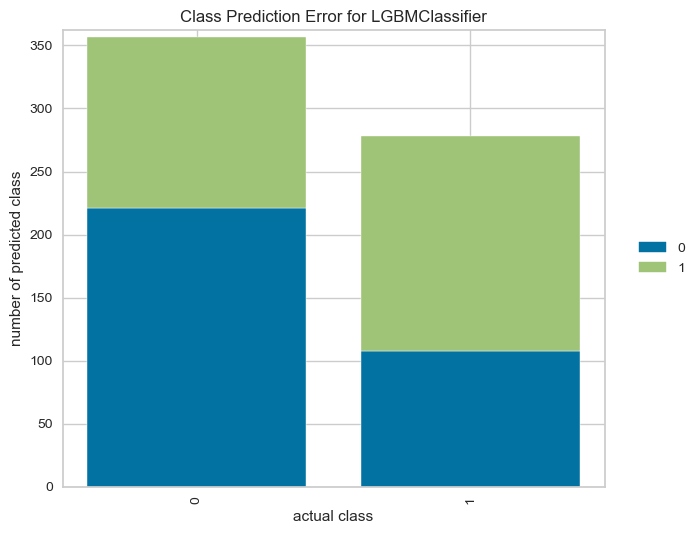

Visual Rendered Successfully
plot_model() succesfully completed......................................


In [386]:
plot_model(best, plot = 'error')